# Data Science Intern @ LetsGrowMore
# Author :Mihir Kudale
# INTERMEDIATE LEVEL TASK 02
# Prediction using Decision Tree Algorithm :
Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://bit.ly/3kXTdox

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

### Import Dataset

In [5]:
#Reading the Iris Dataset
df=pd.read_csv('Iris.csv')

### Analysing Dataset

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.ndim

2

In [9]:
df.shape

(150, 6)

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [14]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [16]:
df['Species'].nunique()

3

In [17]:
print(df.keys())

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


### Data Visualization

In [18]:
import pingouin as pg

In [19]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Species,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.Species,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][0],palette='Pastel1')
    sns.violinplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][1],palette='Pastel1')
    plt.suptitle(a.title())
    plt.show()

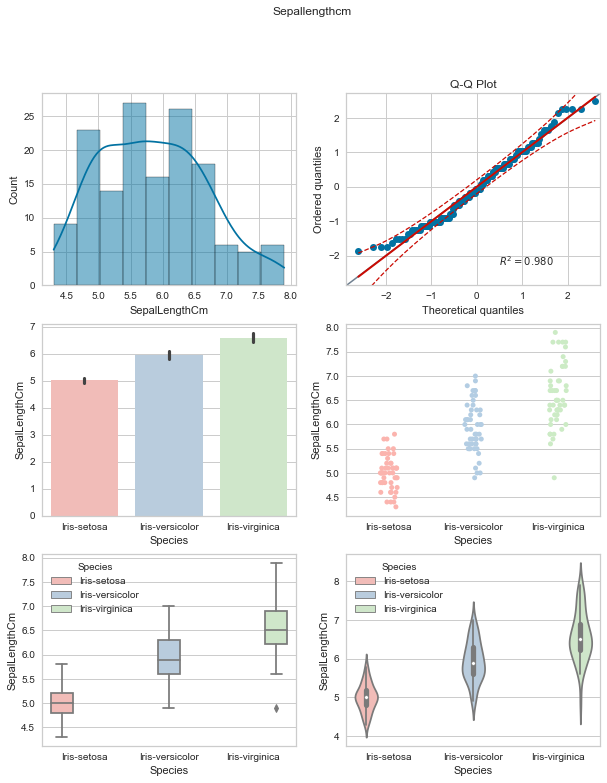

In [20]:
plot_num('SepalLengthCm')

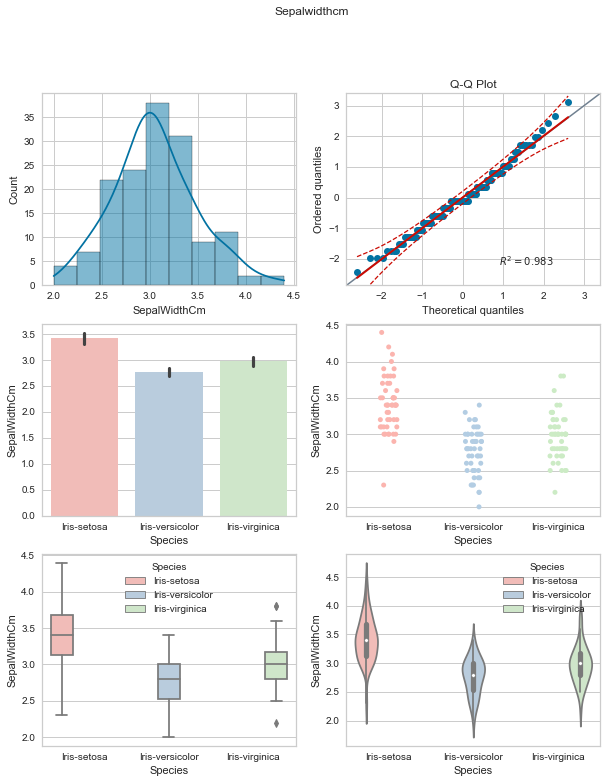

In [21]:
plot_num('SepalWidthCm')

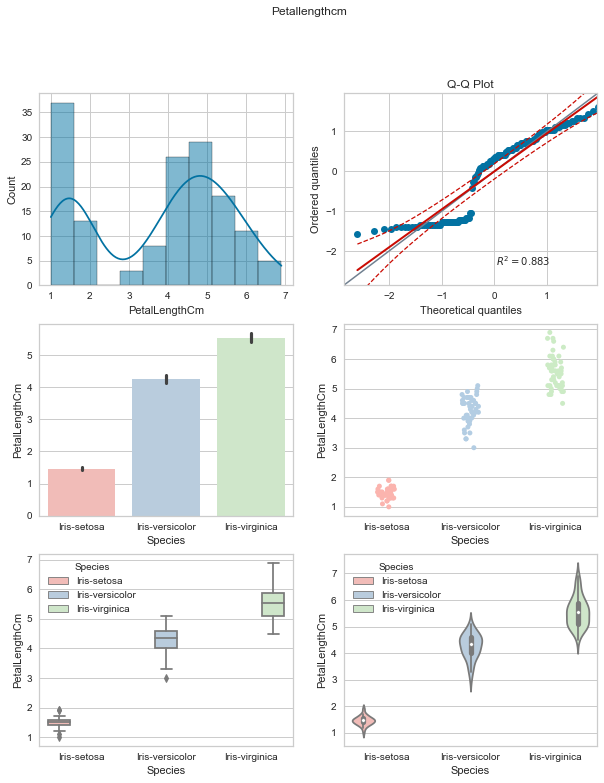

In [22]:
plot_num('PetalLengthCm')

In [23]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.PetalWidthCm ,y=df.SepalWidthCm,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.PetalWidthCm,hue=df.SepalWidthCm,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

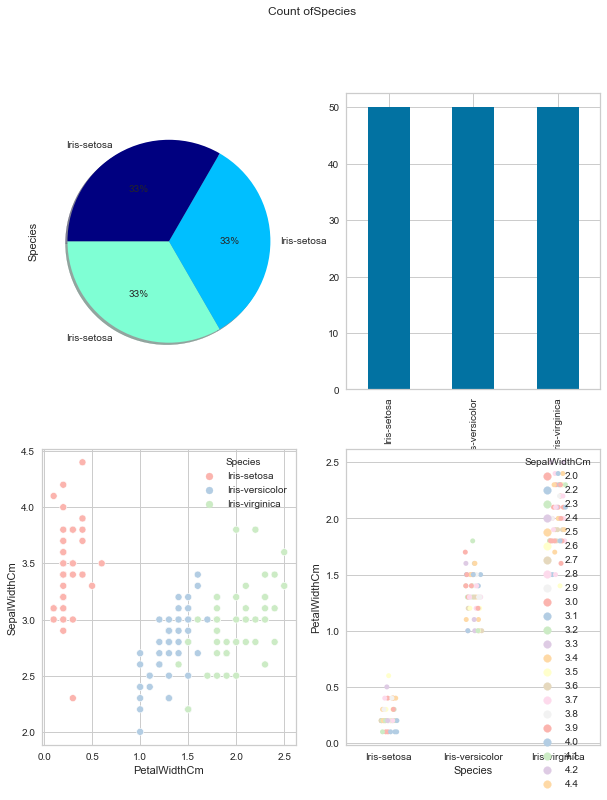

In [24]:
plot_cat('Species')

In [25]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.PetalLengthCm ,y=df.SepalLengthCm,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.PetalLengthCm,hue=df.SepalLengthCm,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

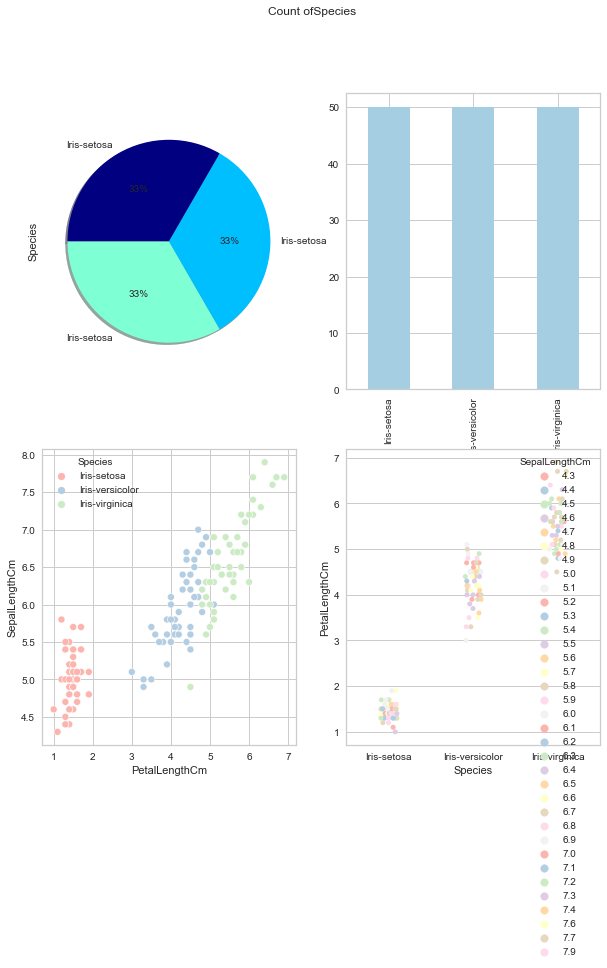

In [30]:
plot_cat('Species')

In [31]:
def plot_kde(a):
    facet=sns.FacetGrid(df,hue='Species',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,df[a].max()))
    plt.title(a.title())
    plt.show()

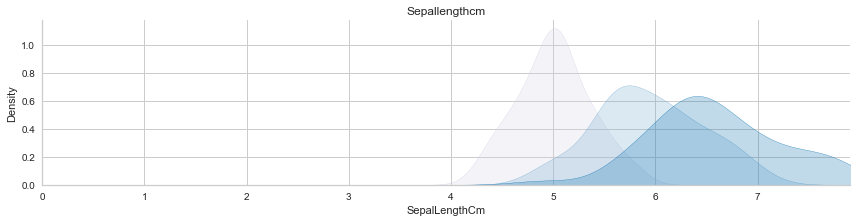

In [32]:
plot_kde('SepalLengthCm')

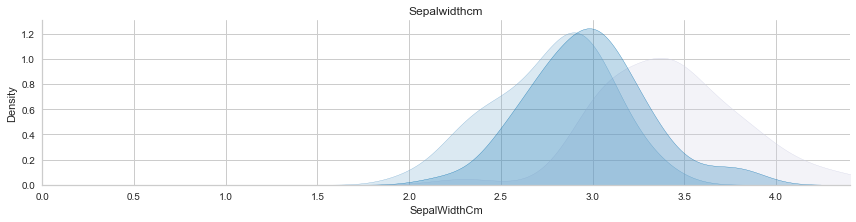

In [33]:
plot_kde('SepalWidthCm')

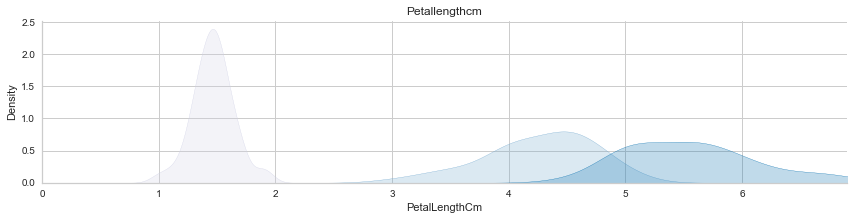

In [34]:
plot_kde('PetalLengthCm')

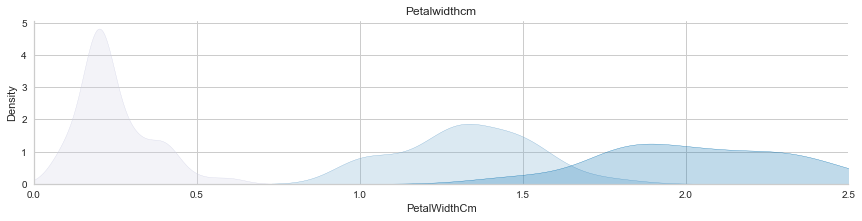

In [35]:
plot_kde('PetalWidthCm')

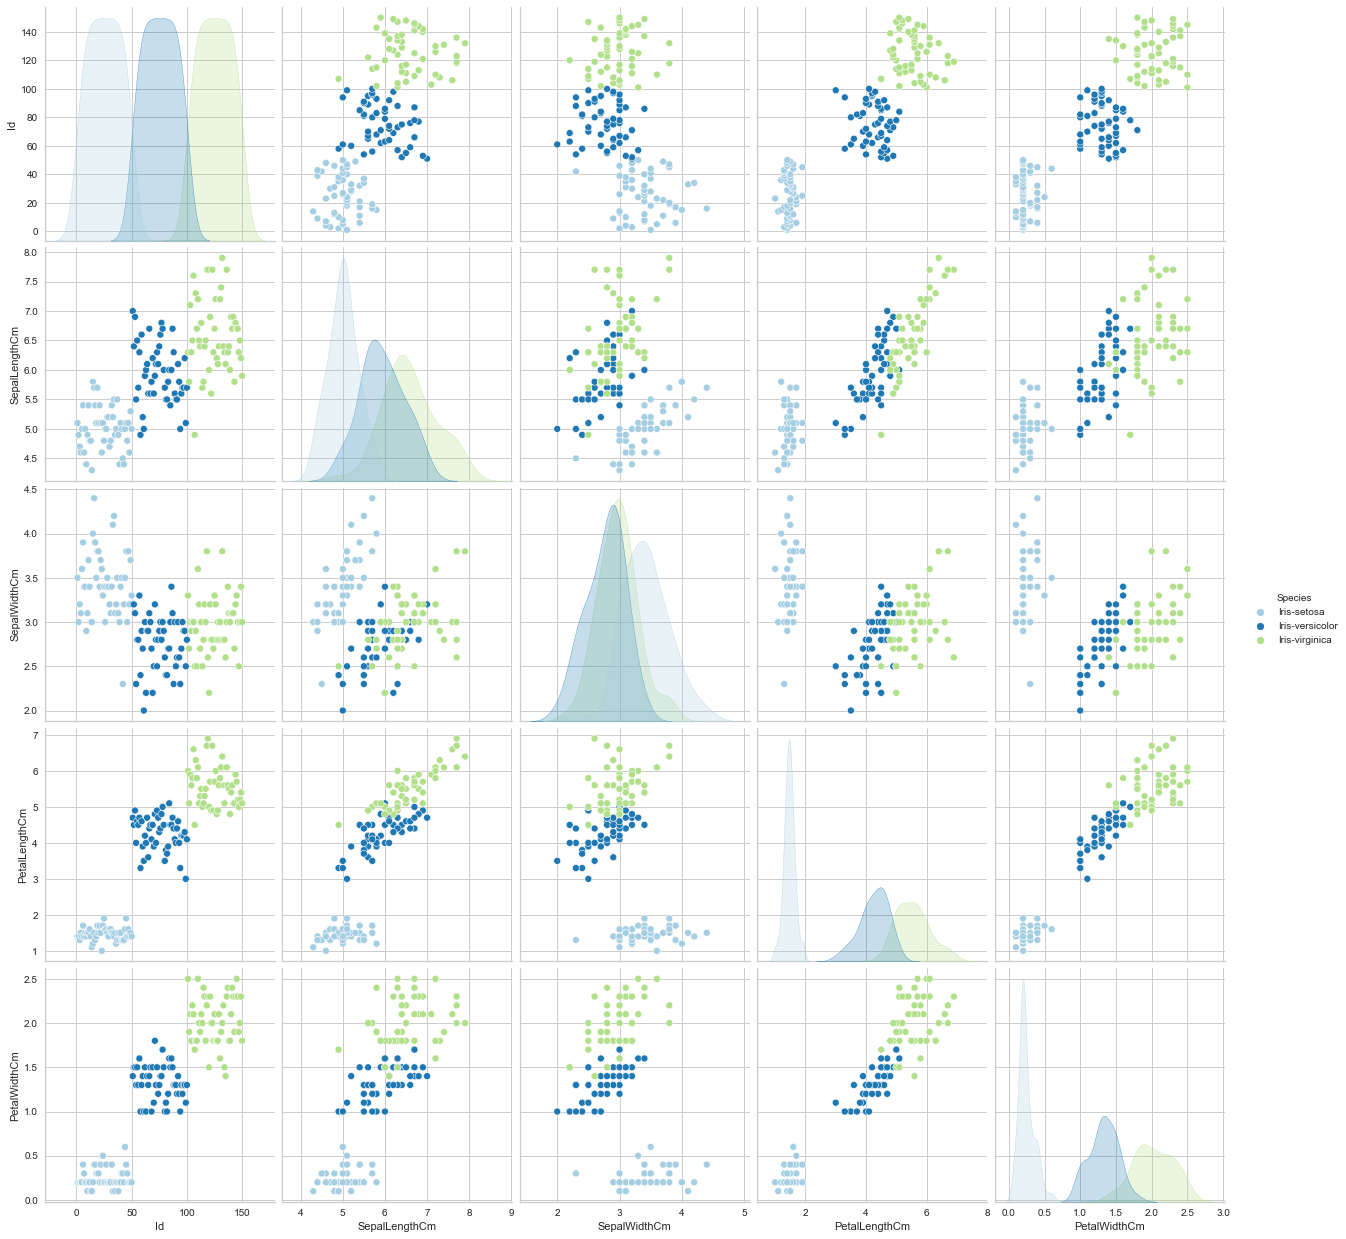

In [36]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Species',height=3.5)
plt.show()

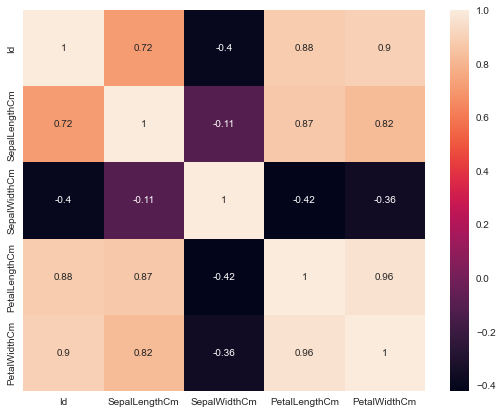

In [37]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

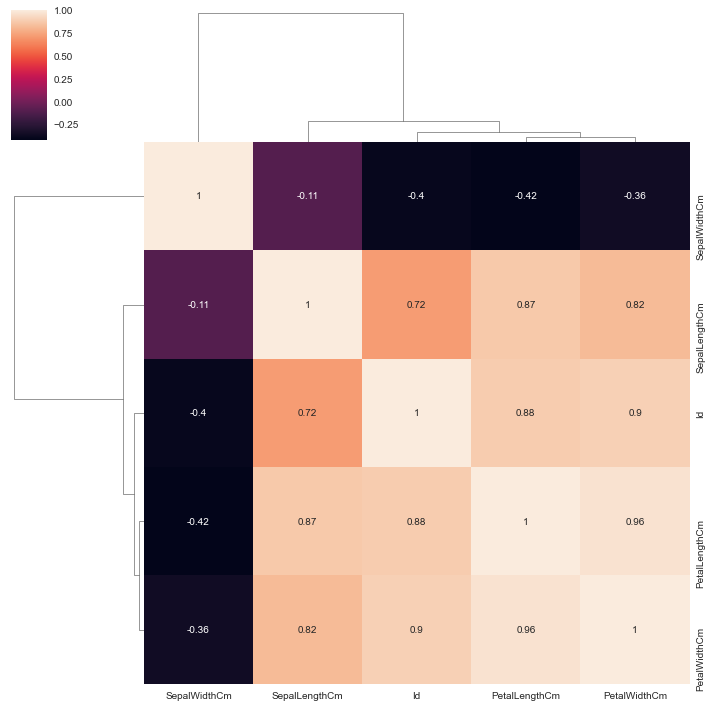

In [38]:
sns.clustermap(df.corr(),annot=True)

#### Dividing the dataset in the target and sample format

In [39]:
#priting samples and target 
X = df.values[:, 0:4] 
y = df.values[:,-1]

In [40]:
X[:5]

array([[1, 5.1, 3.5, 1.4],
       [2, 4.9, 3.0, 1.4],
       [3, 4.7, 3.2, 1.3],
       [4, 4.6, 3.1, 1.5],
       [5, 5.0, 3.6, 1.4]], dtype=object)

In [41]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Split and Train Model

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

### Decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [44]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9916339869281046
Validation Mean Accuracy:  0.9833333333333334


[Text(133.92000000000002, 181.2, 'X[3] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 100.5\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

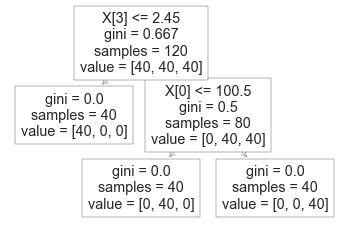

In [45]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)

In [46]:
text_representation = tree.export_text(tree_clf)

print(text_representation)

|--- feature_3 <= 2.45
|   |--- class: Iris-setosa
|--- feature_3 >  2.45
|   |--- feature_0 <= 100.50
|   |   |--- class: Iris-versicolor
|   |--- feature_0 >  100.50
|   |   |--- class: Iris-virginica



In [47]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

y_probas=tree_clf.predict_proba(X_test) skplt.metrics.plot_roc(y_test)

In [48]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
y_pred=tree_clf.predict(X_test)

In [50]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 1.0


### ROC Curve

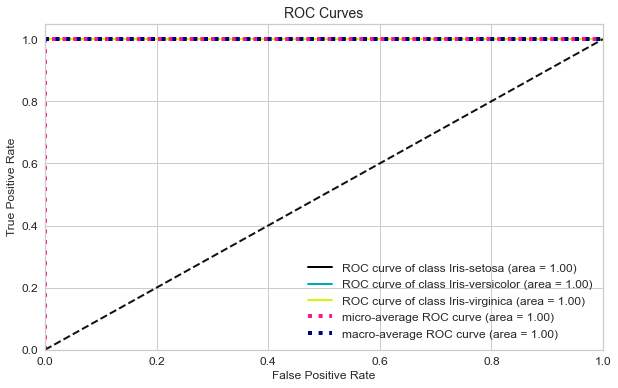

In [51]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Precision Recall Curve

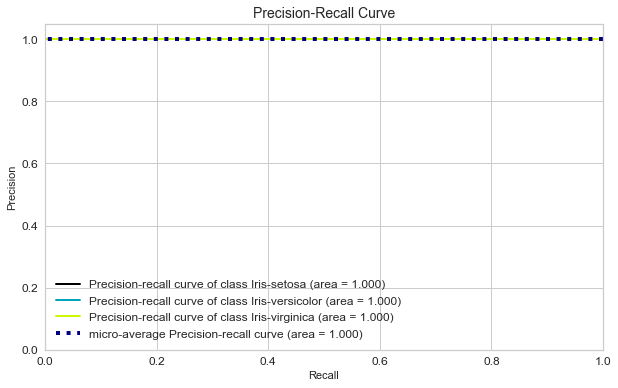

In [52]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Learning Curve

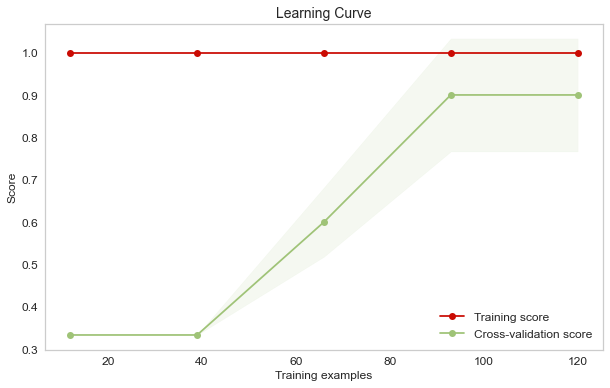

In [53]:
skplt.estimators.plot_learning_curve(tree_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Confusion Matrix

In [54]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

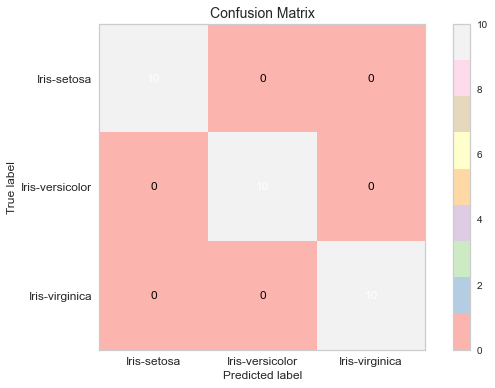

In [55]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

In [56]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



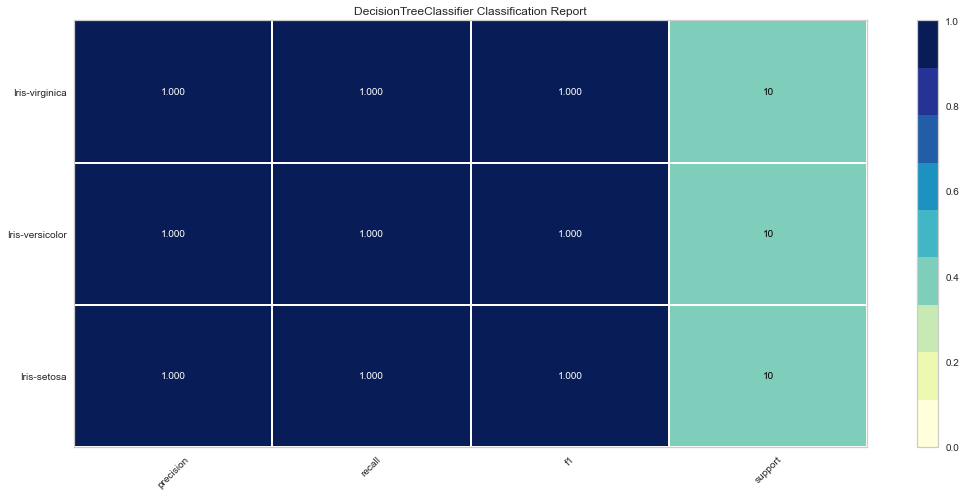

In [57]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(tree_clf, X_train, y_train, X_test, y_test,  support=True,cmap="YlgnBu")
visualizer.show()
plt.show()